In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_excel("/content/Attribute DataSet.xlsx")
data.shape

(500, 14)

In [ ]:
data.columns

Index(['Dress_ID', 'Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration',
       'Pattern Type', 'Recommendation'],
      dtype='object')

In [ ]:
data['Price'] = data['Price'].str.lower()
data['Price'] = data['Price'].replace('very-low', 'low')
data['Price'] = data['Price'].replace('very-high', 'high')
most_common_value = data['Price'].mode()[0]
data['Price'] = data['Price'].fillna(most_common_value)
#====================================================
data['Style'] = data['Style'].str.lower()
#================================================
data['Size'] = data['Size'].str.lower()
data['Size'] = data['Size'].replace('small', 's')
#=================================================
data['Season'] = data['Season'].str.lower()
data['Season'] = data['Season'].replace('automn', 'autumn')

<Axes: xlabel='Price', ylabel='Count'>

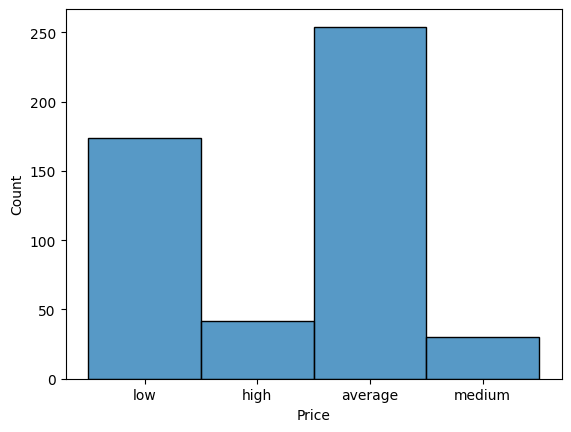

In [ ]:
sns.histplot(data=data, x="Price")

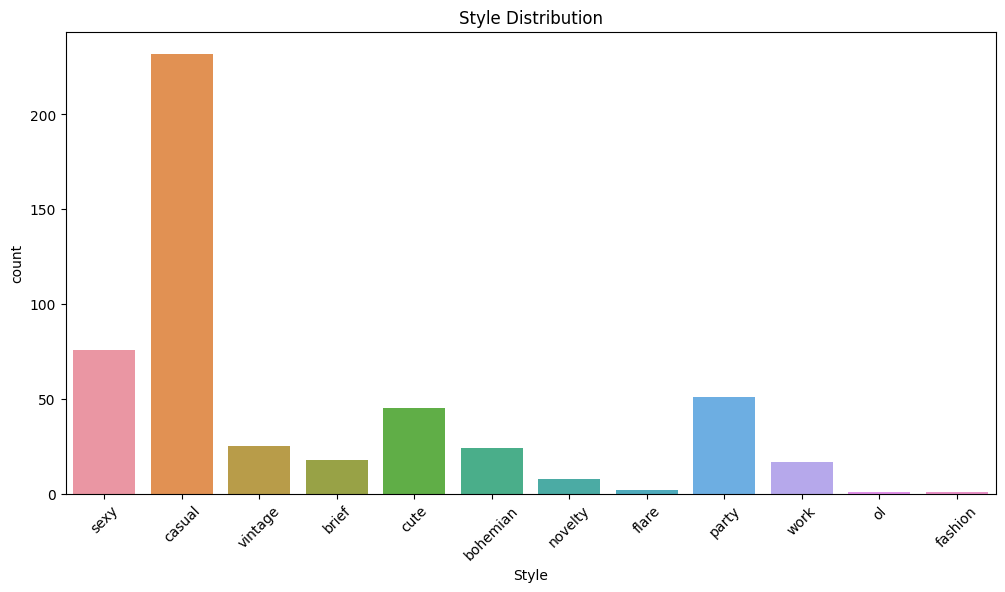

In [ ]:
# Countplot for Style
plt.figure(figsize=(12, 6))
sns.countplot(x='Style', data=data)
plt.title('Style Distribution')
plt.xticks(rotation=45)
plt.show()

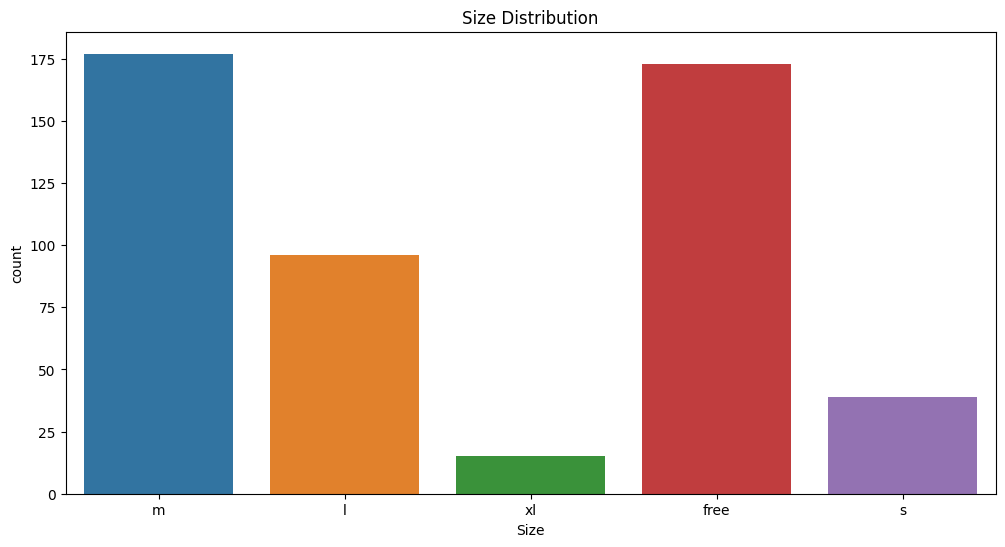

In [ ]:
# Countplot for Size
plt.figure(figsize=(12, 6))
sns.countplot(x='Size', data=data)
plt.title('Size Distribution')
plt.show()

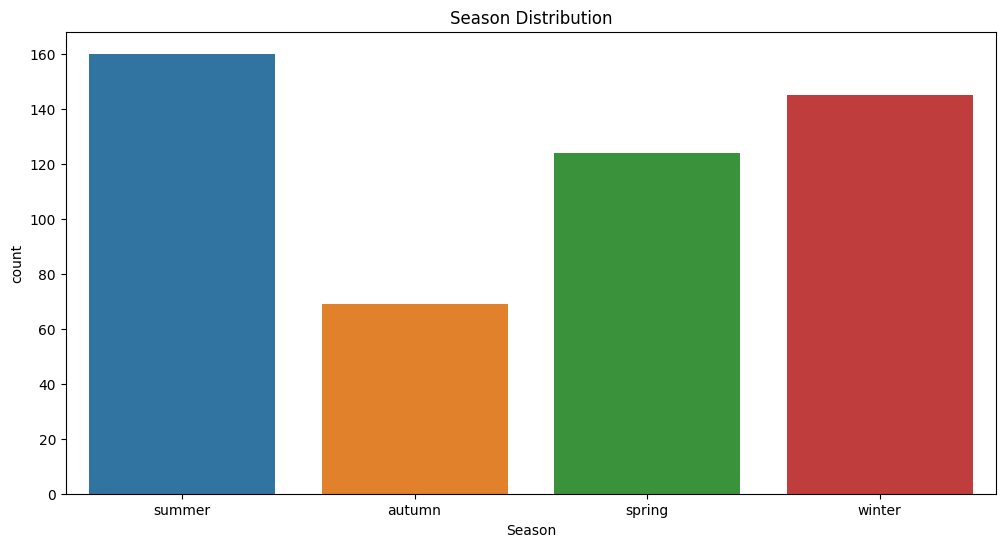

In [ ]:
# Countplot for Season
plt.figure(figsize=(12, 6))
sns.countplot(x='Season', data=data)
plt.title('Season Distribution')
plt.show()

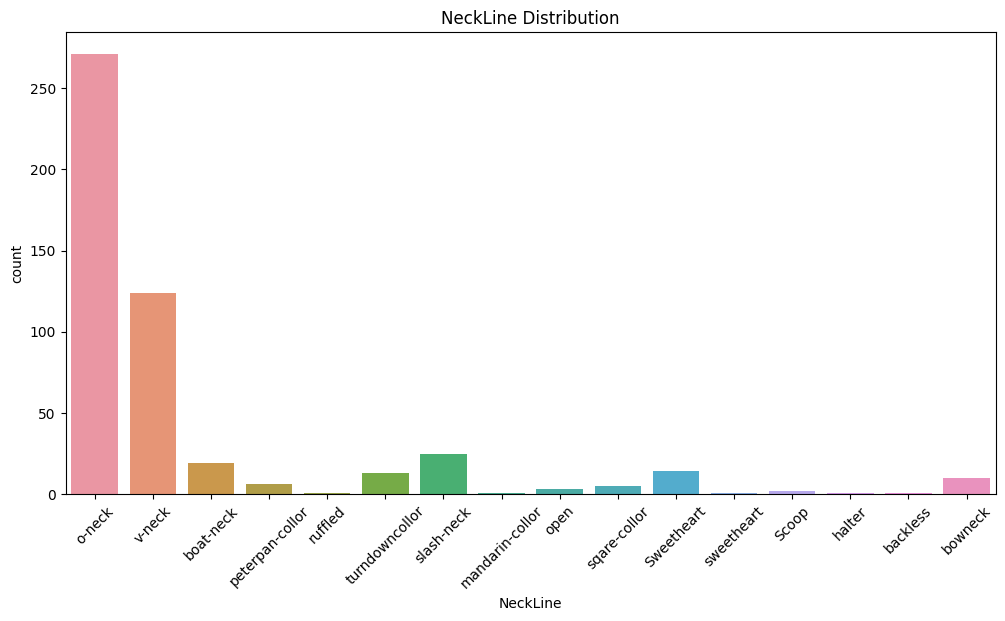

In [ ]:
# Countplot for NeckLine
plt.figure(figsize=(12, 6))
sns.countplot(x='NeckLine', data=data)
plt.title('NeckLine Distribution')
plt.xticks(rotation=45)
plt.show()

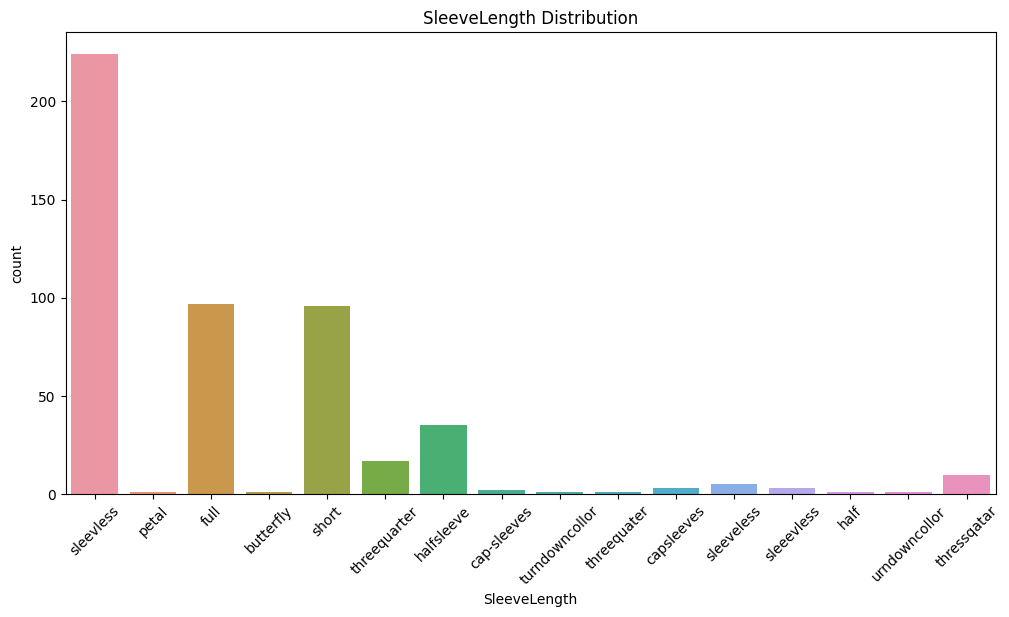

In [ ]:
# Countplot for SleeveLength
plt.figure(figsize=(12, 6))
sns.countplot(x='SleeveLength', data=data)
plt.title('SleeveLength Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data['SleeveLength'] = data['SleeveLength'].str.lower()
data['SleeveLength'] = data['SleeveLength'].replace('sleveless', 'sleevless')

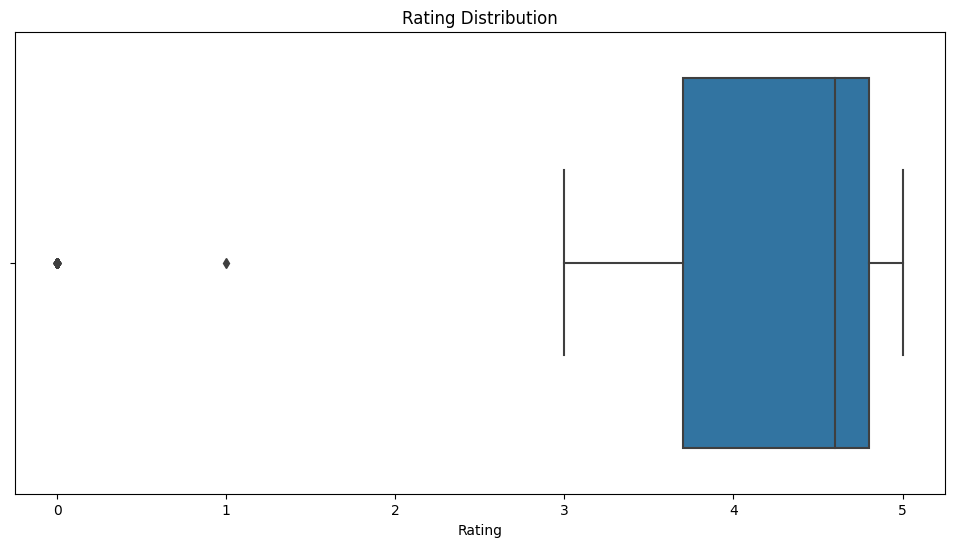

In [ ]:
# Boxplot for Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rating', data=data)
plt.title('Rating Distribution')
plt.show()

In [ ]:
# Plotly visualizations
# Pie chart for Price
price_counts = data['Price'].value_counts()
fig = px.pie(price_counts, values=price_counts.values, names=price_counts.index, title='Price Distribution')
fig.show()

In [ ]:
# Pie chart for Material
material_counts = data['Material'].value_counts()
fig = px.pie(material_counts, values=material_counts.values, names=material_counts.index, title='Material Distribution')
fig.show()

In [ ]:
# Pie chart for FabricType
fabric_type_counts = data['FabricType'].value_counts()
fig = px.pie(fabric_type_counts, values=fabric_type_counts.values, names=fabric_type_counts.index, title='FabricType Distribution')
fig.show()

In [ ]:
# Pie chart for Decoration
decoration_counts = data['Decoration'].value_counts()
fig = px.pie(decoration_counts, values=decoration_counts.values, names=decoration_counts.index, title='Decoration Distribution')
fig.show()

In [ ]:
# Pie chart for Pattern Type
pattern_type_counts = data['Pattern Type'].value_counts()
fig = px.pie(pattern_type_counts, values=pattern_type_counts.values, names=pattern_type_counts.index, title='Pattern Type Distribution')
fig.show()

# __data preparations and feature selections__

In [ ]:
# data = data[['Style', 'Price', 'Rating','Size', 'Season', 'NeckLine', 'SleeveLength', 'Recommendation']]
for col in data.columns:
  if data[col].dtype == 'O':
    mode_values = data[col].mode()[0]
    data[col].fillna(mode_values, inplace=True)
(data.isnull().sum())/len(data)*100

for col in data.columns:
  if data[col].dtype == 'O':
    data[col] = label_encoder.fit_transform(data[col])

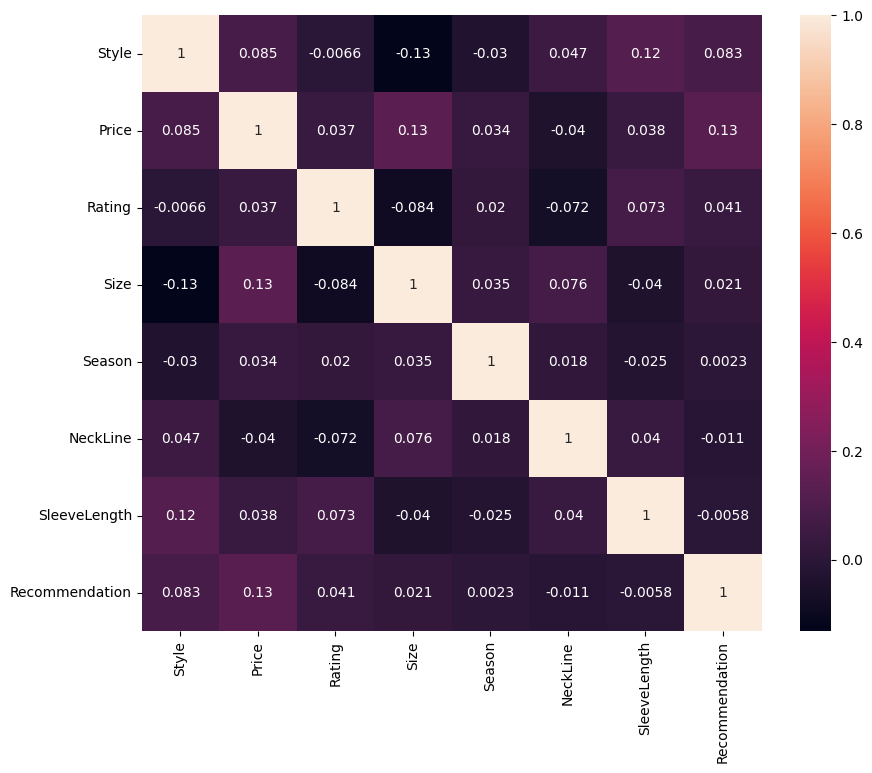

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest, f_classif

target = data['Recommendation']
features = data.drop(['Recommendation'], axis=1)

# Calculate the Pearson correlation coefficient for each feature
correlations = {}
for column in features.columns:
    correlations[column] = pearsonr(features[column], target)[0]

# Rank the features by their correlation with the target variable
ranked_features = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

# Select the top k features using SelectKBest
k = 5
selector = SelectKBest(f_classif, k=k)
selected_features = selector.fit_transform(features, target)

# Print the selected features
print('Selected features:', features.columns[selector.get_support()])

Selected features: Index(['Style', 'Price', 'Rating', 'Size', 'NeckLine'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split data into train and test sets
X = data[['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine']]
y = data['Recommendation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Calculate accuracy on test set
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.54


In [ ]:
from sklearn.svm import SVC
# Train an SVM model
svm = SVC()  
svm.fit(X_train, y_train)

# Predict on the test set and calculate accuracy 
y_pred = svm.predict(X_test)  
accuracy = svm.score(X_test, y_test)
print(accuracy)

0.58


In [ ]:
from sklearn.svm import SVC
# Train an SVM model
svm = SVC()  
svm.fit(X_train, y_train)

# Predict on the test set and calculate accuracy 
y_pred = svm.predict(X_test)  
accuracy = svm.score(X_test, y_test)
print(accuracy)

0.58


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, cv=5)  
grid.fit(X_train, y_train)
print(grid.best_params_) 
print(grid.best_score_)

{'C': 100, 'gamma': 0.001}
0.6142857142857143


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500, max_depth=10)
forest.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest, X, y, cv=5)

print(scores.mean())

0.568
